# Mammal Type Classifier

The purpose of this notebook is to create a mammal type classifier using a pretrained neural network, capable of identifying and categorizing various mammals into five primary groups: primates, rodents, ungulates, carnivores, and marsupials.

To achieve this, we first collect and preprocess approximately 50 images per animal from each mammal category by automating image retrieval from DuckDuckGo. Using requests, we scrape image URLs from search results and download them for training. The script constructs search queries, extracts relevant image links, and saves them in structured datasets.

Next, we fine-tune the pretrained neural network to recognize these mammal groups. Finally, we evaluate the model’s performance by testing it on new images, assessing its accuracy and generalization capabilities.


### Steps:
#### 1. Get and Preprocess data
   Use DuckDuckGo to search for images of various mammal types, extracting image URLs with requests and downloading them for training. Approximately 50 images per animal are collected to ensure dataset diversity
   - Carnivores: Bears, leopards, lions, tigers, and wolves
   - Marsupials: Kangaroos, koalas, opossums, wallabies, and wombats
   - Primates: Baboons, capuchin monkeys, chimpanzees, gorillas, and orangutans
   - Rodents: Beavers, mice, rabbits, rats, and squirrels
   - Ungulates: Deer, elk, giraffes, moose, and zebras
   
#### 2. Train the Model
   Fine-tune a pretrained neural network to recognise these groups

#### 3. Test the Model 
   Test the model on images

## Step 1: Get and Preprocess data

In [1]:
# import libraries
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
# from duckduckgo_search import ddg_imagesddg
from tkinter import Image
from time import sleep
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML
import os
from PIL import Image, UnidentifiedImageError
from io import BytesIO
import matplotlib.pyplot as plt
from duckduckgo_search import DDGS
from pathlib import Path

import os
from collections import defaultdict
import pandas as pd
from pathlib import Path

In [2]:
# duckduckgo search function
def search_duckduckgo_image(query, max_images=1):
    """search for image URLs using DuckDuckGo."""
    with DDGS() as ddgs:
        results = list(ddgs.images(f'{query} mammal photo', max_results=max_images))
    return [img['image'] for img in results] if results else None

def process_image(query, mammal, max_images=1, test=True):
    """process the image search, download, resize, and display/save."""
    urls = search_duckduckgo_image(query, max_images)
    if not urls:
        print("No images found.")
        return

    for i, url in enumerate(urls):
        # download image from url
        headers = {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
            }

        try:
            response = requests.get(url, headers=headers, timeout=5)
            response.raise_for_status()  # ensure we got a valid response
            image = Image.open(BytesIO(response.content))
            image.verify()  # check if the image is valid
            image = Image.open(BytesIO(response.content))  # reopen after verification
        except (requests.exceptions.RequestException, UnidentifiedImageError) as e:
            print(f"Skipping invalid image: {e}")
            continue
    
        # resize image
        resized_image = image.resize((259, 259))

        if test:
            # display image
            print(f'{mammal} - {query}')
            display(resized_image)

            # saving image in sample folder
            resized_image.convert("RGB").save(os.path.join(f'images/sample/{mammal}', f'{query}_{i}.jpg'))


        else:
            # saving image in sample folder
            resized_image.convert("RGB").save(os.path.join(f'images/training/{mammal}', f'{query}_{i}.jpg'))
            print(f"Searching for {mammal} {query} image {i+1} of {max_images}.")

carnivores - bear


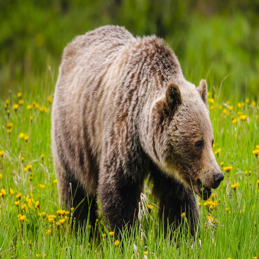

carnivores - leopard


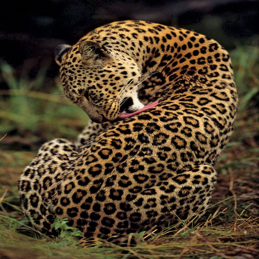

carnivores - lion


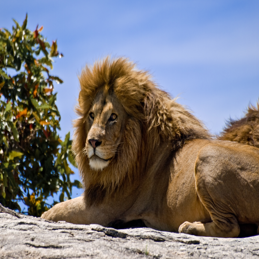

carnivores - tiger


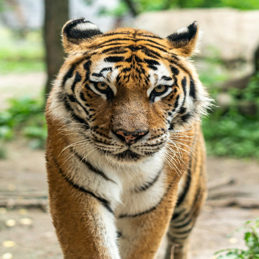

carnivores - wolf


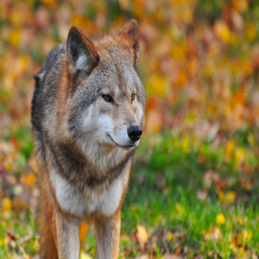

In [ ]:
# testing carnivores
if __name__ == "__main__":
    process_image('bear', 'carnivore', max_images=1, test=True)
    process_image('leopard', 'carnivore', max_images=1, test=True)
    process_image('lion', 'carnivore', max_images=1, test=True)
    process_image('tiger', 'carnivore', max_images=1, test=True)
    process_image('wolf', 'carnivore', max_images=1, test=True)

marsupials - kangaroo


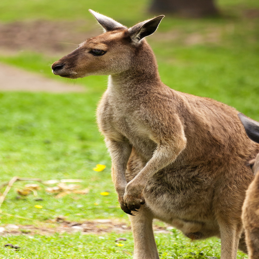

marsupials - koala


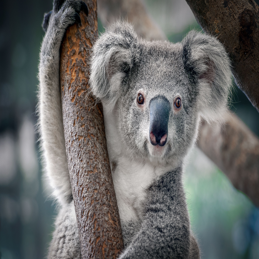

marsupials - opossum


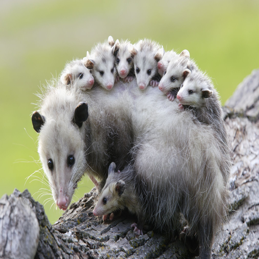

Error fetching image: HTTPConnectionPool(host='www.wild-facts.com', port=80): Max retries exceeded with url: /wp-content/uploads/2010/02/Young_red_necked_wallaby.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x00000151B01D43D0>: Failed to resolve 'www.wild-facts.com' ([Errno 11002] getaddrinfo failed)"))
marsupials - wombat


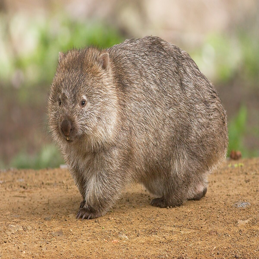

In [ ]:
# testing marsupials
if __name__ == "__main__":
    process_image('kangaroo', 'marsupial', max_images=1, test=True)
    process_image('koala', 'marsupial', max_images=1, test=True)
    process_image('opossum', 'marsupial', max_images=1, test=True)
    process_image('wallaby', 'marsupial', max_images=1, test=True)
    process_image('wombat', 'marsupial', max_images=1, test=True)


primates - baboon


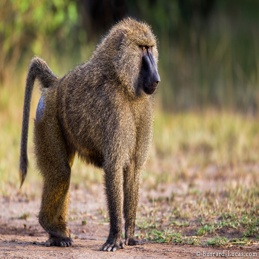

primates - capuchin monkey


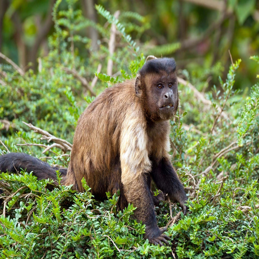

primates - chimpanzee


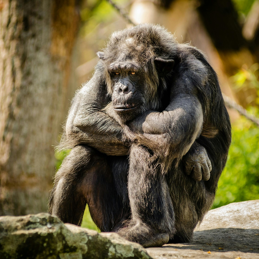

primates - gorilla


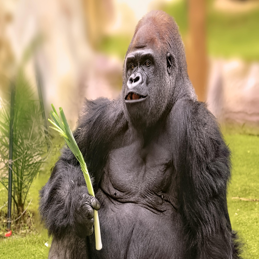

primates - orangutan


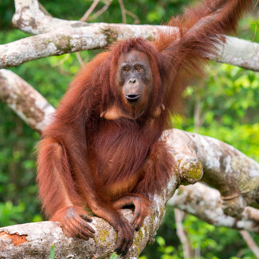

In [ ]:
# testing primates
if __name__ == "__main__":
    process_image('baboon', 'primate', max_images=1, test=True)
    process_image('capuchin monkey', 'primate', max_images=1, test=True)
    process_image('chimpanzee', 'primate', max_images=1, test=True)
    process_image('gorilla', 'primate', max_images=1, test=True)
    process_image('orangutan', 'primate', max_images=1, test=True)

rodents - beaver


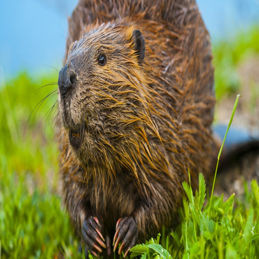

rodents - mouse


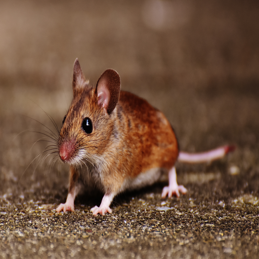

rodents - rabbit


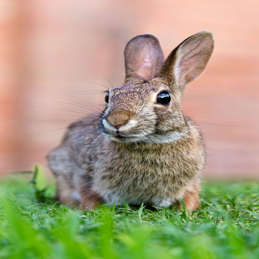

rodents - rat


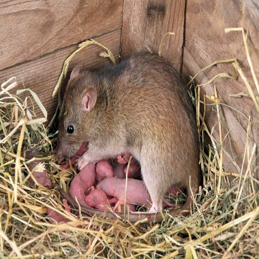

rodents - squirrel


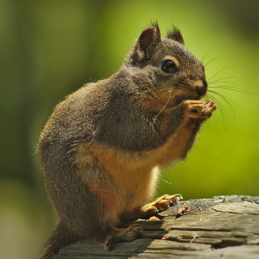

In [ ]:
# testing rodents
if __name__ == "__main__":
    process_image('beaver', 'rodent', max_images=1, test=True)
    process_image('mouse', 'rodent', max_images=1, test=True)
    process_image('rabbit', 'rodent', max_images=1, test=True)
    process_image('rat', 'rodent', max_images=1, test=True)
    process_image('squirrel', 'rodent', max_images=1, test=True)

ungulates - deer


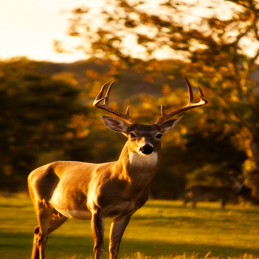

ungulates - elk


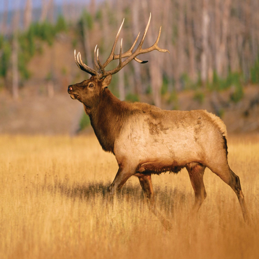

ungulates - giraffe


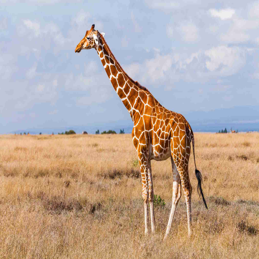

ungulates - moose


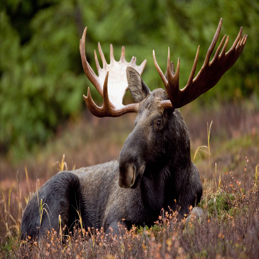

ungulates - zebra


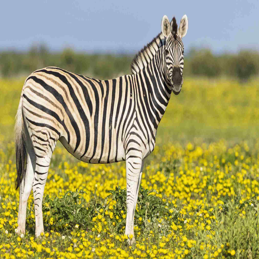

In [ ]:
# testing ungulates
if __name__ == "__main__":
    process_image('deer', 'ungulate', max_images=1, test=True)
    process_image('elk', 'ungulate', max_images=1, test=True)
    process_image('giraffe', 'ungulate', max_images=1, test=True)
    process_image('moose', 'ungulate', max_images=1, test=True)
    process_image('zebra', 'ungulate', max_images=1, test=True)

Lets start building our dataset

In [7]:
# data 
mammal_type_data = {
    'carnivore': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'marsupial': ['kangaroo', 'koala', 'opossum', 'wallaby', 'wombat'],
    'primate': ['baboon', 'capuchin monkey', 'chimpanzee', 'gorilla', 'orangutan'],
    'rodent': ['beaver', 'mouse', 'porcupine', 'rat', 'squirrel'],
    'ungulate': ['deer', 'elk', 'giraffe', 'moose', 'zebra']
}

# function to collect images
def collect_images(dict_data):
    """collect 50 images per animal for all mammals in the dictionary."""
    for key, value in dict_data.items():
        for i in value:
            process_image(i, key, max_images=50, test=False)

In [17]:
# collect images
collect_images(mammal_type_data_3)

Searching for carnivores tiger image 1 of 50.
Skipping invalid image: 404 Client Error: Not Found for url: http://elelur.com/data_images/mammals/tiger/tiger-03.jpg
Searching for carnivores tiger image 3 of 50.
Searching for carnivores tiger image 4 of 50.
Skipping invalid image: HTTPSConnectionPool(host='cdn.chesterzoo.org', port=443): Max retries exceeded with url: /2019/04/2017-Sumatran-tiger-Kirana-in-the-zoo-square.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000151B21DC100>: Failed to resolve 'cdn.chesterzoo.org' ([Errno 11001] getaddrinfo failed)"))
Searching for carnivores tiger image 6 of 50.
Searching for carnivores tiger image 7 of 50.
Searching for carnivores tiger image 8 of 50.
Searching for carnivores tiger image 9 of 50.
Searching for carnivores tiger image 10 of 50.
Searching for carnivores tiger image 11 of 50.
Searching for carnivores tiger image 12 of 50.
Searching for carnivores tiger image 13 of 50.
Searching for carnivores 

In [ ]:
# function to count images per subcategory to test the distribution of images collected
def count_images_per_subcategory(data_dir, class_mapping):
    """count the number of images per subcategory in a dataset."""

    data_dir = Path(data_dir)
    counts = []

    # itterate through each class and its subcategories
    for class_name, subcategories in class_mapping.items():
        class_path = data_dir / class_name
        
        if class_path.is_dir():
            for subcategory in subcategories:
                # find all images that match the subcategory naming pattern
                subcat_images = list(class_path.glob(f"{subcategory}_*.jpg"))
                counts.append([class_name, subcategory, len(subcat_images)])

    # create a DataFrame
    df = pd.DataFrame(counts, columns=["mammal", "animal", "count"])
    return df


In [8]:
# get the counts
df_counts = count_images_per_subcategory("images/training", mammal_type_data)

# view result
print(df_counts)

       mammal           animal  count
0   carnivore             bear     49
1   carnivore          leopard     48
2   carnivore             lion     50
3   carnivore            tiger     46
4   carnivore             wolf     45
5   marsupial         kangaroo     48
6   marsupial            koala     47
7   marsupial          opossum     48
8   marsupial          wallaby     47
9   marsupial           wombat     47
10    primate           baboon     47
11    primate  capuchin monkey     48
12    primate       chimpanzee     48
13    primate          gorilla     49
14    primate        orangutan     46
15     rodent           beaver     45
16     rodent            mouse     48
17     rodent        porcupine     46
18     rodent              rat     50
19     rodent         squirrel     48
20   ungulate             deer     48
21   ungulate              elk     50
22   ungulate          giraffe     49
23   ungulate            moose     47
24   ungulate            zebra     50


## Step 2: Train the Model

In [23]:
# data splitting
import os
import random
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split

# move files into train/val folders and load data using pytorch
import shutil
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# training model
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm
import time

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random


In [ ]:
# dictionary to hold train/val splits
train_files = []
val_files = []

# collect images by class and subcategory
subcategory_images = defaultdict(list)

# iterate over class folders (carnivore, marsupial, etc.)
for class_name in os.listdir("images/training/"):
    class_path = os.path.join("images/training/", class_name)
    
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            if image_file.endswith(".jpg"):
                subcategory = image_file.rsplit("_", 1)[0]  # extract subcategory (e.g., 'bear' from 'bear_0.jpg')
                subcategory_images[(class_name, subcategory)].append(os.path.join(class_path, image_file))

# perform a 80/20 split per subcategory
split_data = []
for (class_name, subcategory), images in subcategory_images.items():
    random.shuffle(images)  # shuffle for randomness
    train, val = train_test_split(images, test_size=0.2, random_state=42)
    
    for file in train:
        split_data.append(("train", class_name, subcategory, file))
    for file in val:
        split_data.append(("val", class_name, subcategory, file))

# convert to dataframe for verification
split_df = pd.DataFrame(split_data, columns=["set", "class", "subcategory", "file"])

# summarize the counts
summary_table = split_df.groupby(["set", "class", "subcategory"]).size().reset_index(name="count")

# display summary of train/val counts per class & subcategory
print(summary_table)


      set      class      subcategory  count
0   train  carnivore             bear     39
1   train  carnivore          leopard     38
2   train  carnivore             lion     40
3   train  carnivore            tiger     36
4   train  carnivore             wolf     36
5   train  marsupial         kangaroo     38
6   train  marsupial            koala     37
7   train  marsupial          opossum     38
8   train  marsupial          wallaby     37
9   train  marsupial           wombat     37
10  train    primate           baboon     37
11  train    primate  capuchin monkey     38
12  train    primate       chimpanzee     38
13  train    primate          gorilla     39
14  train    primate        orangutan     36
15  train     rodent           beaver     36
16  train     rodent            mouse     38
17  train     rodent        porcupine     36
18  train     rodent              rat     40
19  train     rodent         squirrel     38
20  train   ungulate             deer     38
21  train 

In [46]:
# move images from images/training to train and val folders under dataset
train_path = os.path.join("dataset", "train")
val_path = os.path.join("dataset", "val")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# create train/val directories
for path in [train_path, val_path]:
    os.makedirs(path, exist_ok=True)

# move images into correct train/val directories
for _, row in split_df.iterrows():
    dataset_type, class_name, subcategory, file_path = row["set"], row["class"], row["subcategory"], row["file"]
    
    # destination path
    dest_folder = os.path.join("dataset", dataset_type, class_name)
    os.makedirs(dest_folder, exist_ok=True)
    
    # move file
    shutil.move(file_path, os.path.join(dest_folder, os.path.basename(file_path)))

print("Files successfully moved into structured dataset format.")


FileNotFoundError: [Errno 2] No such file or directory: 'images/training/carnivore\\bear_13.jpg'

In [9]:
# define transforms (only resizing + normalization for now)
transform = transforms.Compose([
    transforms.Resize((192, 192)),  # resize to 192x192 (adjustable)
    transforms.ToTensor()           # convert to pytorch tensor
])

# load datasets
train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
val_dataset = datasets.ImageFolder(root=val_path, transform=transform)

# create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# verify class mappings
print("class index mapping:")
print(train_dataset.class_to_idx)
print('')
print('data summary:')
print(f"total | {len(train_dataset) + len(val_dataset)}")
print(f"train | {len(train_dataset)}")
print(f"val   | {len(val_dataset)}")

class index mapping:
{'carnivore': 0, 'marsupial': 1, 'primate': 2, 'rodent': 3, 'ungulate': 4}

data summary:
total | 1194
train | 946
val   | 248


In [38]:
# ---------------------------- initialize model ----------------------------
def initialize_model(model_name, num_classes, device):
    """load a pre-trained model and modify the classification head."""
    model = getattr(models, model_name)(pretrained=True)

    if "resnet" in model_name:
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif "efficientnet" in model_name or "mobilenet" in model_name:
        model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, num_classes)

    return model.to(device)

# ---------------------------- optimizer & loss ----------------------------
def get_optimizer_and_loss(model, lr):
    """return the loss function and optimizer."""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    return criterion, optimizer

# ---------------------------- training function ----------------------------
def train_model(model_name, train_loader, num_classes, num_epochs, lr, device):
    """train a model with a given architecture, dataset, and hyperparameters."""
    
    # initialize model
    model = initialize_model(model_name, num_classes, device)
    
    # define loss function and optimizer
    criterion, optimizer = get_optimizer_and_loss(model, lr)

    # define learning rate scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)

    # training loop
    model.train()
    loss_history = []
    start_time = time.time()

    for epoch in range(num_epochs):
        total_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)

        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, LR = {scheduler.get_last_lr()[0]:.6f}")
        # step the scheduler at the end of each epoch
        scheduler.step()

    training_time = time.time() - start_time
    print(f"\nTraining Complete! Time Taken: {training_time:.2f} sec\n")

    return model, loss_history, training_time

# ---------------------------- evaluation function ----------------------------
def evaluate_model(model, val_loader, device):
    """evaluate the trained model on a validation dataset."""
    
    model.eval()
    correct, total = 0, 0
    loss_total = 0.0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss_total += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    avg_loss = loss_total / len(val_loader)
    print(f"Validation Accuracy:    {accuracy:.2f}%")
    print(f"Validation Loss:        {avg_loss:.4f}")

    return accuracy, avg_loss


In [ ]:
# train model without scheduler
trained_model, loss_history, training_time = train_model(
    model_name="resnet18",
    train_loader=train_loader,
    num_classes=5,  
    num_epochs=15,
    lr=0.001,
    device=device
)

Epoch 1/15: 100%|██████████| 30/30 [00:37<00:00,  1.26s/it]


Epoch 1: Loss = 0.8766


Epoch 2/15: 100%|██████████| 30/30 [00:41<00:00,  1.40s/it]


Epoch 2: Loss = 0.3743


Epoch 3/15: 100%|██████████| 30/30 [00:50<00:00,  1.67s/it]


Epoch 3: Loss = 0.2408


Epoch 4/15: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]


Epoch 4: Loss = 0.1653


Epoch 5/15: 100%|██████████| 30/30 [00:46<00:00,  1.55s/it]


Epoch 5: Loss = 0.0986


Epoch 6/15: 100%|██████████| 30/30 [00:39<00:00,  1.32s/it]


Epoch 6: Loss = 0.0896


Epoch 7/15: 100%|██████████| 30/30 [00:38<00:00,  1.28s/it]


Epoch 7: Loss = 0.0862


Epoch 8/15: 100%|██████████| 30/30 [00:44<00:00,  1.49s/it]


Epoch 8: Loss = 0.1334


Epoch 9/15: 100%|██████████| 30/30 [00:48<00:00,  1.61s/it]


Epoch 9: Loss = 0.2166


Epoch 10/15: 100%|██████████| 30/30 [00:45<00:00,  1.50s/it]


Epoch 10: Loss = 0.2776


Epoch 11/15: 100%|██████████| 30/30 [00:44<00:00,  1.49s/it]


Epoch 11: Loss = 0.2531


Epoch 12/15: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]


Epoch 12: Loss = 0.0788


Epoch 13/15: 100%|██████████| 30/30 [00:44<00:00,  1.48s/it]


Epoch 13: Loss = 0.0624


Epoch 14/15: 100%|██████████| 30/30 [00:36<00:00,  1.22s/it]


Epoch 14: Loss = 0.0899


Epoch 15/15: 100%|██████████| 30/30 [00:36<00:00,  1.22s/it]

Epoch 15: Loss = 0.0489
Training complete! Time taken: 647.22 seconds


In [ ]:
# train model with scheduler | resnet18
trained_model_2, loss_history, training_time = train_model(
    model_name="resnet18",
    train_loader=train_loader,
    num_classes=5,  
    num_epochs=15,
    lr=0.001,
    device=device
)

Epoch 1/15: 100%|██████████| 30/30 [00:36<00:00,  1.21s/it]


Epoch 1: Loss = 0.9097
Epoch 1: Learning Rate = 0.001000


Epoch 2/15: 100%|██████████| 30/30 [00:35<00:00,  1.19s/it]


Epoch 2: Loss = 0.4518
Epoch 2: Learning Rate = 0.001000


Epoch 3/15: 100%|██████████| 30/30 [00:34<00:00,  1.16s/it]


Epoch 3: Loss = 0.2106
Epoch 3: Learning Rate = 0.001000


Epoch 4/15: 100%|██████████| 30/30 [00:35<00:00,  1.17s/it]


Epoch 4: Loss = 0.1065
Epoch 4: Learning Rate = 0.001000


Epoch 5/15: 100%|██████████| 30/30 [00:35<00:00,  1.18s/it]


Epoch 5: Loss = 0.1388
Epoch 5: Learning Rate = 0.000700


Epoch 6/15: 100%|██████████| 30/30 [00:34<00:00,  1.17s/it]


Epoch 6: Loss = 0.1394
Epoch 6: Learning Rate = 0.000700


Epoch 7/15: 100%|██████████| 30/30 [00:35<00:00,  1.18s/it]


Epoch 7: Loss = 0.0830
Epoch 7: Learning Rate = 0.000700


Epoch 8/15: 100%|██████████| 30/30 [00:39<00:00,  1.30s/it]


Epoch 8: Loss = 0.0713
Epoch 8: Learning Rate = 0.000700


Epoch 9/15: 100%|██████████| 30/30 [00:39<00:00,  1.33s/it]


Epoch 9: Loss = 0.0538
Epoch 9: Learning Rate = 0.000700


Epoch 10/15: 100%|██████████| 30/30 [00:40<00:00,  1.37s/it]


Epoch 10: Loss = 0.0354
Epoch 10: Learning Rate = 0.000490


Epoch 11/15: 100%|██████████| 30/30 [00:52<00:00,  1.74s/it]


Epoch 11: Loss = 0.0090
Epoch 11: Learning Rate = 0.000490


Epoch 12/15: 100%|██████████| 30/30 [00:50<00:00,  1.70s/it]


Epoch 12: Loss = 0.0096
Epoch 12: Learning Rate = 0.000490


Epoch 13/15: 100%|██████████| 30/30 [00:48<00:00,  1.61s/it]


Epoch 13: Loss = 0.0113
Epoch 13: Learning Rate = 0.000490


Epoch 14/15: 100%|██████████| 30/30 [00:44<00:00,  1.47s/it]


Epoch 14: Loss = 0.0055
Epoch 14: Learning Rate = 0.000490


Epoch 15/15: 100%|██████████| 30/30 [00:40<00:00,  1.34s/it]

Epoch 15: Loss = 0.0050
Epoch 15: Learning Rate = 0.000343
Training complete! Time taken: 603.28 seconds


In [ ]:
# train model with scheduler | efficientnet
trained_model_3, loss_history, training_time = train_model(
    model_name= "efficientnet_b0",
    train_loader=train_loader,
    num_classes=5,  
    num_epochs=15,
    lr=0.001,
    device=device
)

c:\Users\roger\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\roger\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\roger/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:07<00:00, 2.80MB/s]
Epoch 1/15: 100%|██████████| 30/30 [00:49<00:00,  1.67s/it]


Epoch 1: Loss = 0.6288
Epoch 1: Learning Rate = 0.001000


Epoch 2/15: 100%|██████████| 30/30 [00:47<00:00,  1.59s/it]


Epoch 2: Loss = 0.2076
Epoch 2: Learning Rate = 0.001000


Epoch 3/15: 100%|██████████| 30/30 [00:48<00:00,  1.61s/it]


Epoch 3: Loss = 0.1716
Epoch 3: Learning Rate = 0.001000


Epoch 4/15: 100%|██████████| 30/30 [00:48<00:00,  1.60s/it]


Epoch 4: Loss = 0.1481
Epoch 4: Learning Rate = 0.001000


Epoch 5/15: 100%|██████████| 30/30 [00:47<00:00,  1.59s/it]


Epoch 5: Loss = 0.1029
Epoch 5: Learning Rate = 0.000700


Epoch 6/15: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it]


Epoch 6: Loss = 0.0946
Epoch 6: Learning Rate = 0.000700


Epoch 7/15: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]


Epoch 7: Loss = 0.0367
Epoch 7: Learning Rate = 0.000700


Epoch 8/15: 100%|██████████| 30/30 [00:49<00:00,  1.64s/it]


Epoch 8: Loss = 0.0267
Epoch 8: Learning Rate = 0.000700


Epoch 9/15: 100%|██████████| 30/30 [00:48<00:00,  1.61s/it]


Epoch 9: Loss = 0.0353
Epoch 9: Learning Rate = 0.000700


Epoch 10/15: 100%|██████████| 30/30 [00:48<00:00,  1.61s/it]


Epoch 10: Loss = 0.0147
Epoch 10: Learning Rate = 0.000490


Epoch 11/15: 100%|██████████| 30/30 [00:51<00:00,  1.70s/it]


Epoch 11: Loss = 0.0226
Epoch 11: Learning Rate = 0.000490


Epoch 12/15: 100%|██████████| 30/30 [00:51<00:00,  1.72s/it]


Epoch 12: Loss = 0.0088
Epoch 12: Learning Rate = 0.000490


Epoch 13/15: 100%|██████████| 30/30 [00:51<00:00,  1.70s/it]


Epoch 13: Loss = 0.0055
Epoch 13: Learning Rate = 0.000490


Epoch 14/15: 100%|██████████| 30/30 [00:48<00:00,  1.62s/it]


Epoch 14: Loss = 0.0067
Epoch 14: Learning Rate = 0.000490


Epoch 15/15: 100%|██████████| 30/30 [00:52<00:00,  1.74s/it]

Epoch 15: Loss = 0.0063
Epoch 15: Learning Rate = 0.000343
Training complete! Time taken: 739.51 seconds


In [ ]:
# train model with scheduler | mobilenet
trained_model_4, loss_history, training_time = train_model(
    model_name= "mobilenet_v3_large",
    train_loader=train_loader,
    num_classes=5,  
    num_epochs=15,
    lr=0.001,
    device=device

c:\Users\roger\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\roger\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to C:\Users\roger/.cache\torch\hub\checkpoints\mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:07<00:00, 2.77MB/s]
Epoch 1/15: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]


Epoch 1: Loss = 0.6099
Epoch 1: Learning Rate = 0.001000


Epoch 2/15: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]


Epoch 2: Loss = 0.2172
Epoch 2: Learning Rate = 0.001000


Epoch 3/15: 100%|██████████| 30/30 [00:28<00:00,  1.05it/s]


Epoch 3: Loss = 0.1617
Epoch 3: Learning Rate = 0.001000


Epoch 4/15: 100%|██████████| 30/30 [00:30<00:00,  1.02s/it]


Epoch 4: Loss = 0.1062
Epoch 4: Learning Rate = 0.001000


Epoch 5/15: 100%|██████████| 30/30 [00:27<00:00,  1.07it/s]


Epoch 5: Loss = 0.0698
Epoch 5: Learning Rate = 0.000700


Epoch 6/15: 100%|██████████| 30/30 [00:28<00:00,  1.05it/s]


Epoch 6: Loss = 0.0426
Epoch 6: Learning Rate = 0.000700


Epoch 7/15: 100%|██████████| 30/30 [00:28<00:00,  1.06it/s]


Epoch 7: Loss = 0.0234
Epoch 7: Learning Rate = 0.000700


Epoch 8/15: 100%|██████████| 30/30 [00:30<00:00,  1.03s/it]


Epoch 8: Loss = 0.0207
Epoch 8: Learning Rate = 0.000700


Epoch 9/15: 100%|██████████| 30/30 [00:29<00:00,  1.03it/s]


Epoch 9: Loss = 0.0173
Epoch 9: Learning Rate = 0.000700


Epoch 10/15: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]


Epoch 10: Loss = 0.0221
Epoch 10: Learning Rate = 0.000490


Epoch 11/15: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]


Epoch 11: Loss = 0.0048
Epoch 11: Learning Rate = 0.000490


Epoch 12/15: 100%|██████████| 30/30 [00:29<00:00,  1.02it/s]


Epoch 12: Loss = 0.0092
Epoch 12: Learning Rate = 0.000490


Epoch 13/15: 100%|██████████| 30/30 [00:30<00:00,  1.02s/it]


Epoch 13: Loss = 0.0030
Epoch 13: Learning Rate = 0.000490


Epoch 14/15: 100%|██████████| 30/30 [00:28<00:00,  1.06it/s]


Epoch 14: Loss = 0.0039
Epoch 14: Learning Rate = 0.000490


Epoch 15/15: 100%|██████████| 30/30 [00:27<00:00,  1.08it/s]

Epoch 15: Loss = 0.0030
Epoch 15: Learning Rate = 0.000343
Training complete! Time taken: 430.39 seconds


## Step 3: Test the Model

In [70]:
# import interpretation functions
import importlib
import utils.custom_interpretation
importlib.reload(utils.custom_interpretation)

from utils.custom_interpretation import CustomInterpretation

### Resnet

In [ ]:
# evaluate model on trained_model
evaluate_model(
    trained_model, 
    val_loader, 
    device=device)

Validation Accuracy: 73.79% | Validation Loss: 1.0378


(73.79032258064517, 1.0377645655535161)

In [ ]:
# evaluate model on trained model with scheduler | restnet
evaluate_model(
    trained_model_2, 
    val_loader, 
    device=device)

Validation Accuracy: 85.08% | Validation Loss: 0.5540


(85.08064516129032, 0.5540399244055152)

### Efficientnet

In [47]:
# evaluate model on trained model with scheduler | efficientnet
evaluate_model(
    trained_model_3,
      val_loader, 
      device=device)

Validation Accuracy:    93.95%
Validation Loss:        0.1938


(93.95161290322581, 0.19377159234136343)

In [ ]:
# efficientnet interpretaion instance
interp_efficientnet = CustomInterpretation.from_model(
    trained_model_3, 
    val_loader, 
    device, 
    train_dataset.classes)

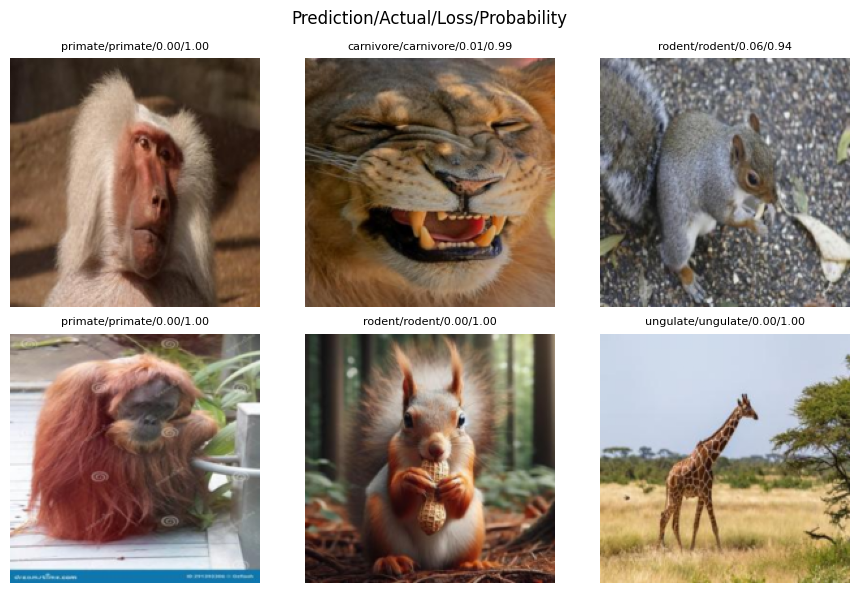

In [75]:
# plot random predictions
interp_efficientnet.plot_random_predictions(n=6, cols=3)


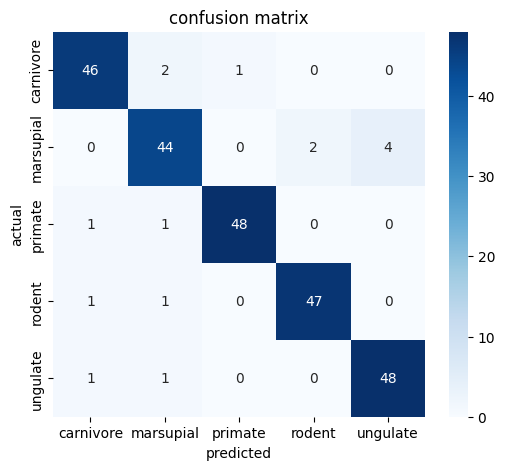

In [76]:
# plot confusion matrix
interp_efficientnet.plot_confusion_matrix()


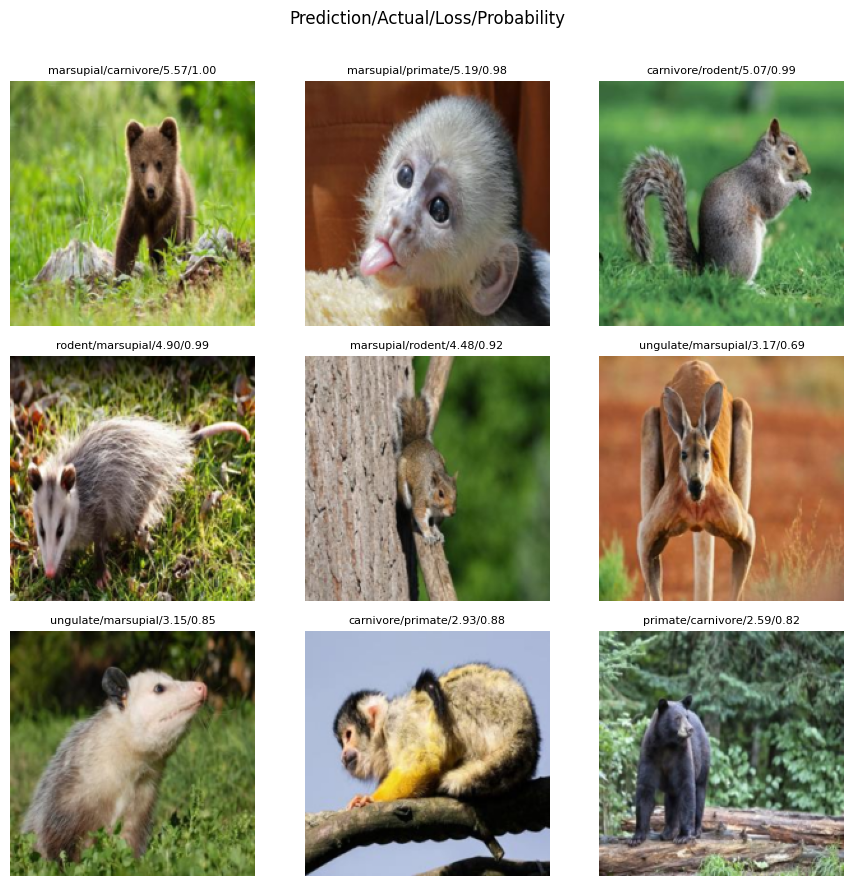

In [77]:
# plot top losses 
interp_efficientnet.plot_top_losses(k=9, largest=True, cols=3)

### Mobilenet

In [78]:
# evaluate model on trained model with scheduler | mobilenet
evaluate_model(
    trained_model_4, 
    val_loader, 
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

Validation Accuracy:    92.34%
Validation Loss:        0.3125


(92.33870967741936, 0.3125203177332878)

In [79]:
# workingnet interpretaion instance
interp_workingnet = CustomInterpretation.from_model(
    trained_model_4, 
    val_loader, 
    device, 
    train_dataset.classes)

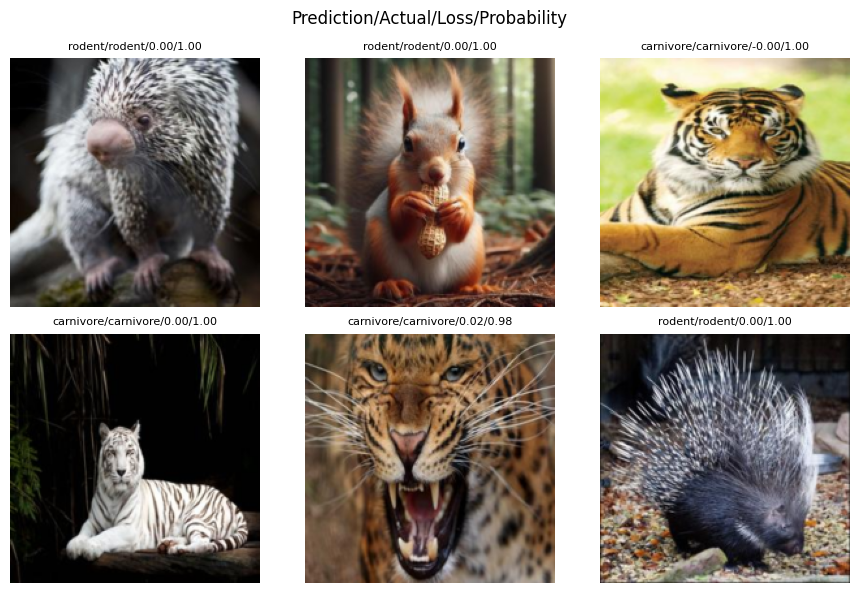

In [80]:
# plot random predictions
interp_workingnet.plot_random_predictions(n=6, cols=3)

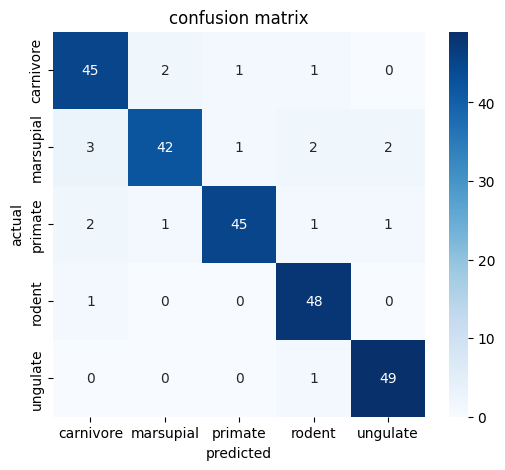

In [81]:
# plot confusion matrix
interp_workingnet.plot_confusion_matrix()

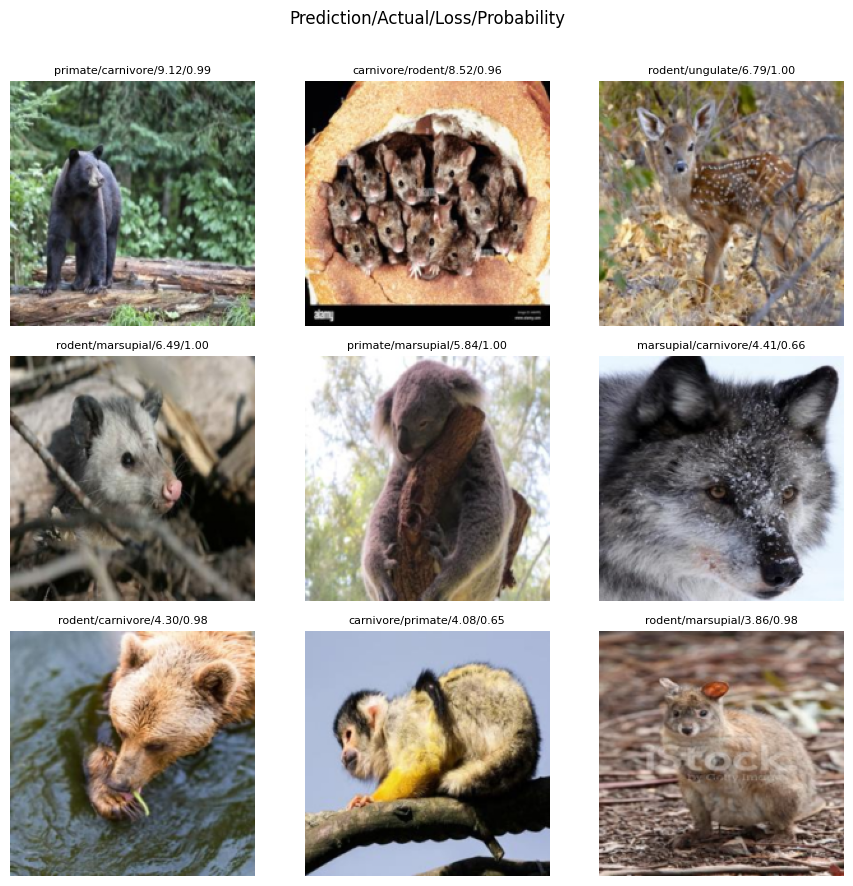

In [82]:
# plot top losses
interp_workingnet.plot_top_losses(k=9, largest=True, cols=3)

In [ ]:
import pickle

# save the trained model
with open("mammal_classifier.pkl", "wb") as f:
    pickle.dump(trained_model, f)

print("Model saved as mammal_classifier.pkl")


In [ ]:
# create a pickle file
from IPython.display import FileLink

trained_model.export('model.pkl')
FileLink('model.pkl')